Nama Anggota Kelompok 8:

*   Laila Mustika Sari (11221002)
*   Alpian Roymundus Siringo-ringo (11211009)
*   Arief Reno Fathurrahman (11201014)

Dataset: https://drive.google.com/file/d/1036Ys40YVOSkqjR6-q5tBm9gIGKIwdv_/view?usp=sharing

Attribut:


1.   reviewId = Id dari akun reviewer
2.   userName = nama pengguna reviewer
3. userImage = foto pengguna
4. content = Isi konten review dari pengguna
5. score = nilai rating yang diberikan pengguna
6. thumbcount = banyak like dari komentar atau review pengguna
7. reviewcreatedVersion = versi aplikasi saat diberikan review oleh pengguna
8. at = waktu diberikan review
9. replycontent = balasan dari review
10. reliedat = waktu untuk balasan review
11. appVersion = versi dari aplikasi






# Import Modul

In [1]:
import pandas as pd
import re

In [3]:
df = pd.read_csv('/content/tiktok.csv')
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,8c029d6c-9282-4034-9838-53f957384007,Amin Santoso,https://play-lh.googleusercontent.com/a-/ALV-U...,Tiktok sangat bagus. Bisa berkarya dan mendapa...,5,622,34.3.3,2024-04-20 20:26:25,NaN,NaN,34.3.3
1,5be47d92-8ede-4f9a-a613-3107e9bfbde2,monica hsu,https://play-lh.googleusercontent.com/a/ACg8oc...,Saya suka dengan aplikasi tiktok dan aktif men...,5,1332,33.8.5,2024-03-13 23:45:22,NaN,NaN,33.8.5
2,a8d020fa-07ac-46e1-9ec1-9a1d6b24abec,Oppo A16,https://play-lh.googleusercontent.com/a/ACg8oc...,Maaf saya kasih 🌟 2 karena aplikasi nya kurang...,2,30,34.5.5,2024-05-04 02:50:04,NaN,NaN,34.5.5
3,26fbfb0b-c11b-46e5-8e8b-d9a2803615ee,Verdi Ximenes,https://play-lh.googleusercontent.com/a-/ALV-U...,Tiktok nya sangat bagus tapi pas di buka video...,3,57,33.8.5,2024-04-18 20:02:07,NaN,NaN,33.8.5
4,07d94c25-28a3-4b6d-a404-720513cf1c9a,Nenk shinta,https://play-lh.googleusercontent.com/a-/ALV-U...,Kenapa dengan tiktok saya pas buka muter muter...,2,1799,34.1.5,2024-04-08 15:41:52,NaN,NaN,34.1.5
...,...,...,...,...,...,...,...,...,...,...,...
393,f6998227-f297-4c94-a3b4-c05c79ae3d98,F5X,https://play-lh.googleusercontent.com/a/ACg8oc...,Hallo saya sangat kecewa sama tiktok karena sa...,1,133,25.7.3,2022-08-18 08:50:31,NaN,NaN,25.7.3
394,9c4b27b6-941e-4d45-97ff-9232132d6663,ozho jabra,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi ini sangat penting untuk menghibur da...,5,10,NaN,2020-09-06 13:06:58,NaN,NaN,NaN
395,6f8c4dd1-714c-4210-ba0b-37b70ee02ed8,Sisan Ismail,https://play-lh.googleusercontent.com/a/ACg8oc...,"aplikasi ini sangat bagus dan menghibur, tapi ...",5,5,NaN,2020-07-12 22:41:40,NaN,NaN,NaN
396,adc9f7f6-3586-4fa4-9e4c-01681b9c55f0,Neli Wulansari,https://play-lh.googleusercontent.com/a/ACg8oc...,Banyak ilmu yang didapat dan untuk pengalaman ...,5,81,23.7.3,2022-03-24 20:28:18,NaN,NaN,23.7.3


# Cleaning Data

In [4]:
df = df[['userName', 'content', 'score']]

Mengambil 3 atribut saja untuk digunakan dalam proses analisis sentimen

In [5]:
df.shape

(398, 3)

In [6]:
df = df.drop_duplicates(subset=['content'])

In [7]:
df.duplicated().sum()

0

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

,0
userName,0
content,0
score,0


In [10]:
df.shape

(398, 3)

Berdasarkan output di atas, setelah dilakukan proses menghapus data yang duplicate dan baris data yang kosong, untuk banyak data masih sama

In [11]:
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)

  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  return text

df['content'] = df['content'].apply(clean_twitter_text)

Melakukan pembersihan data yang masih terdapat noise, yang nantinya akan mengganggu proses analisis sentimen.

In [12]:
df.to_csv("/content/hasil_cleaningData.csv")

menyimpan hasil pembersiihan

# Pra-Processing Data

In [13]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00


In [14]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("/content/hasil_cleaningData.csv", index_col=0)
df

,userName,content,score
0,Amin Santoso,Tiktok sangat bagus Bisa berkarya dan mendapat...,5
1,monica hsu,Saya suka dengan aplikasi tiktok dan aktif men...,5
2,Oppo A16,Maaf saya kasih 2 karena aplikasi nya kurang b...,2
3,Verdi Ximenes,Tiktok nya sangat bagus tapi pas di buka video...,3
4,Nenk shinta,Kenapa dengan tiktok saya pas buka muter muter...,2
...,...,...,...
393,F5X,Hallo saya sangat kecewa sama tiktok karena sa...,1
394,ozho jabra,Aplikasi ini sangat penting untuk menghibur da...,5
395,Sisan Ismail,aplikasi ini sangat bagus dan menghibur tapi s...,5
396,Neli Wulansari,Banyak ilmu yang didapat dan untuk pengalaman ...,5


In [16]:
df.shape


(398, 3)

# Filter Token

In [17]:
def filter_tokens_by_length(dataframe, column, min_words, max_words):
    # Tokenisasi kata
    words_count = dataframe[column].astype(str).apply(lambda x: len(x.split()))
    # Membuat filter untuk jumlah kata
    mask = (words_count >= min_words) & (words_count <= max_words)
    # Mengaplikasikan filter ke DataFrame
    filtered_df = dataframe[mask]
    return filtered_df

# Menggunakan filter_tokens_by_length untuk mendapatkan baris dengan jumlah kata antara 3 dan 50
min_words = 3
max_words = 50
df = filter_tokens_by_length(df, 'content', min_words, max_words)

In [18]:
score = df['score']

In [19]:
score

,score
0,5
2,2
3,3
4,2
5,1
...,...
393,1
394,5
395,5
396,5


In [22]:
score.to_csv("/content/score.csv")

# Normalisasi

Melakukan Normalisasi pada beberapa kata dengan tujuan tidak ada kata-kata yang ambigu atau typo, sehingga nantinya bisa diproses dengan baik oleh komputer.


In [23]:
# Normalisasi
norm = {' yg ':' yang ', ' udh ':' udah ', 'wkwk ':' ', ' min ':' kak ', ' malem ':' malam', ' malem2 ':' malam ', ' sm ':' sama ', ' dy ':' dia ', ' lg ':' lagi ', ' skrg ':' sekarang ', ' ddpn ':' didepan ', ' makasi ':' makasih ', ' pertamaz ':' pertamax ', ' jg ':' juga ', ' donk ':' dong ', ' ikutann ':' ikutan ', ' banyakk ':' banyak ', ' twt ':' tweet', 'mantaap ':'mantap ', ' juarak':' juara ', 'daridulu ':'dari dulu ', 'siapp ':'siap ', ' gamau ':' tidak mau ', ' sll ':' selalu ', ' qu ':' aku ', ' krn ':' karena ', ' irii':' iri', ' muluu ':' terus ', 'mada ':'masa ', 'jgn ':'jangan ', ' jgn ':' jangan ', ' muluuu ':' terus ', 'ntar ':'nanti ', ' awtnya':' awetnya', 'gg ':'keren ', ' kerennn':' keren ', ' bisaa ':' bisa ', 'gaaa':'tidak ', " yg ": " yang ", ' nyampe':' sampai', ' nyampe ':' sampai ', ' lu ':' kamu ', ' ikhlaaasss ':' ikhlas ', ' gak ':' tidak ', ' klo ':' kalo ', ' amp ': ' sampai ', ' ga ':' tidak ', ' yaaaa':' ya ', 'betolll ':'betul ', ' kaga ':' tidak ', ' idk ':' tidak tahu ', ' jkt ':' jakarta ', ' lo ':' kamu ', ' bjir ':' ', ' kek ':' seperti ', ' yg ':' yang ', ' utk ':' untuk ', 'kismin ':'miskin ', ' kismin ':' miskin ', ' pd ':' pada ', ' dgn ':' dengan ', ' ituu ':' itu ', ' jg ':' juga ', 'yoi':'iya ', ' yoi ':' iya ', 'org2 ':'orang ', ' tak ':' tidak ', ' kyk ':' seperti ', ' sbg ':' sebagai ', ' anjjjj ':' ', ' bgt ':' banget ', 'km ':'kamu ', ' km ':' kamu', ' byk ':' banyak ', ' lg ':' lagi ', ' mrk ':' mereka ', ' blm ':' belum '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

<ipython-input-23-ce1f4ad1ed4c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda x: normalisasi(x))


,userName,content,score
0,Amin Santoso,Tiktok sangat bagus Bisa berkarya dan mendapat...,5
2,Oppo A16,Maaf saya kasih 2 karena aplikasi nya kurang b...,2
3,Verdi Ximenes,Tiktok nya sangat bagus tapi pas di buka video...,3
4,Nenk shinta,Kenapa dengan tiktok saya pas buka muter muter...,2
5,Kelvin Aprillio,makin di update malah oploadnya selalu gagal m...,1
...,...,...,...
393,F5X,Hallo saya sangat kecewa sama tiktok karena sa...,1
394,ozho jabra,Aplikasi ini sangat penting untuk menghibur da...,5
395,Sisan Ismail,aplikasi ini sangat bagus dan menghibur tapi s...,5
396,Neli Wulansari,Banyak ilmu yang didapat dan untuk pengalaman ...,5


# Stopword

Stopword adala proses kata-kata umum dalam bahasa yang biasanya tidak membawa makna yang signifikan dalam analisis teks dan sering diabaikan dalam pemrosesan teks, seperti dalam analisis sentimen, pencarian informasi, atau pemodelan topik. Contoh kata stopword dalam bahasa Indonesia meliputi: "yang," "dan," "di," "ke," "untuk," "adalah," dan lain-lain.

In [24]:
# Stopwords
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopword(x))
df.head()

<ipython-input-24-5d4a920e9e10>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda x: stopword(x))


,userName,content,score
0,Amin Santoso,Tiktok sangat bagus Bisa berkarya mendapat tem...,5
2,Oppo A16,Maaf kasih 2 aplikasi nya kurang bagus padahal...,2
3,Verdi Ximenes,Tiktok nya sangat bagus pas buka video nya non...,3
4,Nenk shinta,Kenapa tiktok pas buka muter muter padahal wif...,2
5,Kelvin Aprillio,makin update malah oploadnya selalu gagal mulu...,1


# Tokenize

Tokenisasi adalah proses memecah teks menjadi unit-unit yang lebih kecil yang disebut token. Token ini dapat berupa kata, frasa, atau bahkan karakter, tergantung pada tujuan analisis. Tokenisasi adalah langkah penting dalam pemrosesan bahasa alami (Natural Language Processing - NLP) dan digunakan sebagai dasar untuk berbagai aplikasi, termasuk analisis teks, analisis sentimen, dan pemodelan topik.

In [25]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

,content
0,"[Tiktok, sangat, bagus, Bisa, berkarya, mendap..."
2,"[Maaf, kasih, 2, aplikasi, nya, kurang, bagus,..."
3,"[Tiktok, nya, sangat, bagus, pas, buka, video,..."
4,"[Kenapa, tiktok, pas, buka, muter, muter, pada..."
5,"[makin, update, malah, oploadnya, selalu, gaga..."
...,...
393,"[Hallo, sangat, kecewa, sama, tiktok, saya, pu..."
394,"[Aplikasi, sangat, penting, menghibur, menarik..."
395,"[aplikasi, sangat, bagus, menghibur, sayang, H..."
396,"[Banyak, ilmu, didapat, untuk, pengalaman, dis..."


# Stemming

Stemming digunakan untuk menghilangkan akhiran, imbuhan, atau variasi lain dari kata untuk mendapatkan bentuk dasarnya, sehingga memudahkan analisis teks dan pemahaman makna.

In [26]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv("/content/hasil_preprocessingData.csv", index=False)

tiktok sangat bagus bisa karya dapat teman banyak bagai daerah dan untung hasil cuan moga tiktok tambah fitur bagai fasilitas sukses and maju tiktok
maaf kasih 2 aplikasi nya kurang bagus padahal jaring full klw udah buka sekali bisa buka lqi
tiktok nya sangat bagus pas buka video nya nonton tidak kapai jadi di baik yakkk tiktok paling the best
kenapa tiktok pas buka muter muter padahal wifi penuh gambar nya muter hitam ada gambar nya di baik dong
makin update malah oploadnya selalu gagal mulu slalu hapus terus tambah buruk aja nih aplikasi
terima kasih tik tok untuk tik tok ini masuk dalam peringkat social populer mudah cari mengupdatenya terima kasih
aku suka sama nih tiktok aku serba gagal buat bikin video aku aplod nga like
poko bagus kalau lebih bagus seperti efect kurang lain
kalau mau bikin video lewat templat kadang kadang engga mau simpan video kadang dan kadang engga
aplikasi bagus banget kenapa aku tambah lagu tik tok favorit muncul sana pliss pulih kan
mengapa baharu wilaya

In [27]:
tokenized

,content
0,tiktok sangat bagus bisa karya dapat teman ban...
2,maaf kasih 2 aplikasi nya kurang bagus padahal...
3,tiktok nya sangat bagus pas buka video nya non...
4,kenapa tiktok pas buka muter muter padahal wif...
5,makin update malah oploadnya selalu gagal mulu...
...,...
393,hallo sangat kecewa sama tiktok saya punya aku...
394,aplikasi sangat penting hibur tarik waktu sedih
395,aplikasi sangat bagus hibur sayang hp sya kent...
396,banyak ilmu dapat untuk alam tiap waktu simpan...


# Gabungkan Data

In [29]:
df = pd.read_csv('/content/hasil_preprocessingData.csv')
score = pd.read_csv('/content/score.csv')
score.drop(columns=["Unnamed: 0"], inplace=True)

In [30]:
# Menggabungkan kedua DataFrame berdasarkan index
merged_df = pd.concat([df, score], axis=1)


In [31]:
merged_df

,content,score
0,tiktok sangat bagus bisa karya dapat teman ban...,5
1,maaf kasih 2 aplikasi nya kurang bagus padahal...,2
2,tiktok nya sangat bagus pas buka video nya non...,3
3,kenapa tiktok pas buka muter muter padahal wif...,2
4,makin update malah oploadnya selalu gagal mulu...,1
...,...,...
376,hallo sangat kecewa sama tiktok saya punya aku...,1
377,aplikasi sangat penting hibur tarik waktu sedih,5
378,aplikasi sangat bagus hibur sayang hp sya kent...,5
379,banyak ilmu dapat untuk alam tiap waktu simpan...,5


In [32]:
merged_df.to_csv("/content/hasil_preprocessingContentScore.csv")

In [33]:
df = pd.read_csv('/content/hasil_preprocessingContentScore.csv')
df

,Unnamed: 0,content,score
0,0,tiktok sangat bagus bisa karya dapat teman ban...,5
1,1,maaf kasih 2 aplikasi nya kurang bagus padahal...,2
2,2,tiktok nya sangat bagus pas buka video nya non...,3
3,3,kenapa tiktok pas buka muter muter padahal wif...,2
4,4,makin update malah oploadnya selalu gagal mulu...,1
...,...,...,...
376,376,hallo sangat kecewa sama tiktok saya punya aku...,1
377,377,aplikasi sangat penting hibur tarik waktu sedih,5
378,378,aplikasi sangat bagus hibur sayang hp sya kent...,5
379,379,banyak ilmu dapat untuk alam tiap waktu simpan...,5


# Labeling

Metode labeling pada kasus ini menggunakan nilai score atau rating dari pengguna


In [34]:
def label_sentiment(score):
    if score <= 2:
        return 'negatif'
    # elif score == 3:
    #     return 'netral'
    else:
        return 'positif'

df['sentimen'] = df['score'].apply(label_sentiment)

In [35]:
sentimen_counts = df.sentimen.value_counts()
sentimen_counts

,count
sentimen,
positif,238
negatif,143


# Data Imbalance

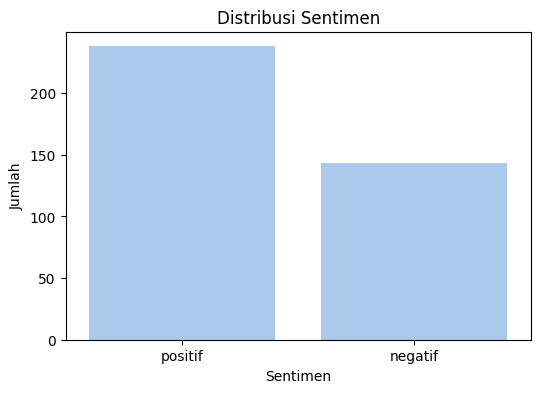

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Visualisasi
sns.set_palette("pastel")
plt.figure(figsize=(6, 4))
sns.countplot(x='sentimen', data=df)
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

Pada Hasil visualisasi ini, tidak terdapat data imbalance, yang mana kompsisi sentimen positif dan negatif tidak terlalu jauh.


In [37]:
data_negatif = df[df['sentimen'] == 'negatif']
data_positif = df[df['sentimen'] == 'positif']

# Visualisasi Data

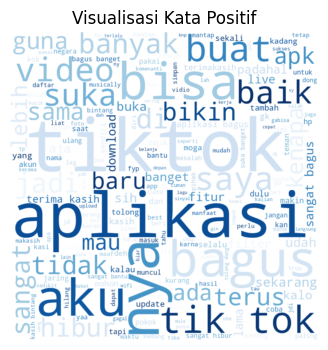

In [38]:
all_text_s1 = ' '.join(word for word in data_positif["content"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Positif")
plt.margins(x=0, y=0)
plt.show()

Pada bagian ini terlihat beberapa kata yang sering muncul untuk sentimen positif.


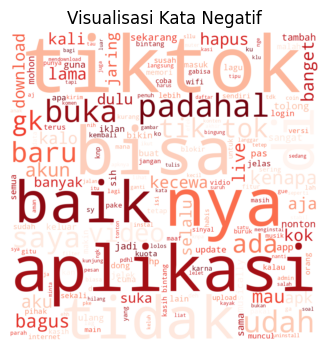

In [39]:
all_text_s0 = ' '.join(word for word in data_negatif["content"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.margins(x=0, y=0)
plt.show()

Pada bagian ini, diperlihatkan beberapa kata yang sering muncul pada sentimen negatif.

# Pembagian Data

In [40]:
X=df.content
y=df.sentimen

Pada bagian ini, data dibagi dengan perbanding Training : Testing adalah 80:20

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [42]:
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 304
Banyak data x_test  : 77
Banyak data y_train : 304
Banyak data y_test  : 77


Berikut ini adalah jumlah untuk masing-masing Data Training dan Data Testing